# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
#!pip install citipy


from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


 # Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
     # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
 # Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}&q="
    

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city.replace(" ","+")
    
    


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']      
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alugan
Processing Record 2 of Set 1 | goderich
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | zonguldak
Processing Record 5 of Set 1 | businga
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | mildura
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | orsha
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | flinders
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | kahului
Processing Record 23 of Set 1 | urucuca
Processing R

Processing Record 38 of Set 4 | lorengau
Processing Record 39 of Set 4 | tarata
Processing Record 40 of Set 4 | utiroa
City not found. Skipping...
Processing Record 41 of Set 4 | saint-joseph
Processing Record 42 of Set 4 | lazaro cardenas
Processing Record 43 of Set 4 | mbandaka
Processing Record 44 of Set 4 | rio gallegos
Processing Record 45 of Set 4 | mudgee
Processing Record 46 of Set 4 | luwuk
Processing Record 47 of Set 4 | bethel
Processing Record 48 of Set 4 | kankon
Processing Record 49 of Set 4 | hukuntsi
Processing Record 0 of Set 5 | opuwo
Processing Record 1 of Set 5 | karamken
City not found. Skipping...
Processing Record 2 of Set 5 | necochea
Processing Record 3 of Set 5 | aksarka
Processing Record 4 of Set 5 | mar del plata
Processing Record 5 of Set 5 | najran
Processing Record 6 of Set 5 | duldurga
Processing Record 7 of Set 5 | ust-tsilma
Processing Record 8 of Set 5 | iracoubo
Processing Record 9 of Set 5 | sinnamary
Processing Record 10 of Set 5 | port blair
Proce

Processing Record 29 of Set 8 | san quintin
Processing Record 30 of Set 8 | nuevo progreso
Processing Record 31 of Set 8 | zaraza
Processing Record 32 of Set 8 | anopino
Processing Record 33 of Set 8 | sterling
Processing Record 34 of Set 8 | muisne
Processing Record 35 of Set 8 | komsomolets
Processing Record 36 of Set 8 | shingu
Processing Record 37 of Set 8 | puri
Processing Record 38 of Set 8 | quesnel
Processing Record 39 of Set 8 | tigil
Processing Record 40 of Set 8 | boddam
Processing Record 41 of Set 8 | os
City not found. Skipping...
Processing Record 42 of Set 8 | maridi
Processing Record 43 of Set 8 | bat yam
Processing Record 44 of Set 8 | touros
Processing Record 45 of Set 8 | kargil
Processing Record 46 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 47 of Set 8 | hami
Processing Record 48 of Set 8 | saint george
Processing Record 49 of Set 8 | torres
Processing Record 0 of Set 9 | tromso
Processing Record 1 of Set 9 | raudeberg
Processing Record 2 of S

Processing Record 13 of Set 12 | komsomolskiy
Processing Record 14 of Set 12 | porto novo
Processing Record 15 of Set 12 | labuhan
Processing Record 16 of Set 12 | ilheus
Processing Record 17 of Set 12 | asau
Processing Record 18 of Set 12 | chandigarh
Processing Record 19 of Set 12 | syracuse
Processing Record 20 of Set 12 | kruisfontein
Processing Record 21 of Set 12 | drayton valley
Processing Record 22 of Set 12 | zhaoyuan
Processing Record 23 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 24 of Set 12 | picota
Processing Record 25 of Set 12 | evensk
Processing Record 26 of Set 12 | port keats
Processing Record 27 of Set 12 | banda aceh
Processing Record 28 of Set 12 | villazon
Processing Record 29 of Set 12 | xuddur
Processing Record 30 of Set 12 | liwale
Processing Record 31 of Set 12 | kavaratti
Processing Record 32 of Set 12 | nyurba
Processing Record 33 of Set 12 | hirara
Processing Record 34 of Set 12 | zachagansk
City not found. Skipping...
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alugan,12.2188,125.4808,78.51,85,21,14.92,PH,1676057436
1,goderich,43.7501,-81.7165,34.12,64,100,12.66,CA,1676057436
2,barrow,71.2906,-156.7887,-7.58,77,100,11.50,US,1676057437
3,zonguldak,41.2500,31.8333,28.99,91,100,1.52,TR,1676057438
4,businga,3.3333,20.8833,77.32,29,7,0.81,CD,1676057438


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alugan,12.2188,125.4808,78.51,85,21,14.92,PH,1676057436
1,goderich,43.7501,-81.7165,34.12,64,100,12.66,CA,1676057436
2,barrow,71.2906,-156.7887,-7.58,77,100,11.50,US,1676057437
3,zonguldak,41.2500,31.8333,28.99,91,100,1.52,TR,1676057438
4,businga,3.3333,20.8833,77.32,29,7,0.81,CD,1676057438


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

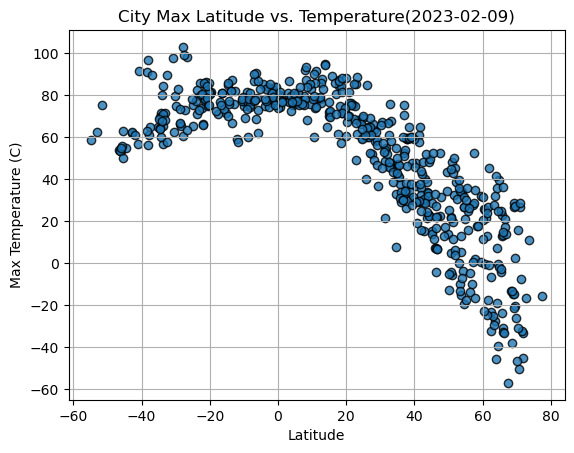

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature(2023-02-09)')
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

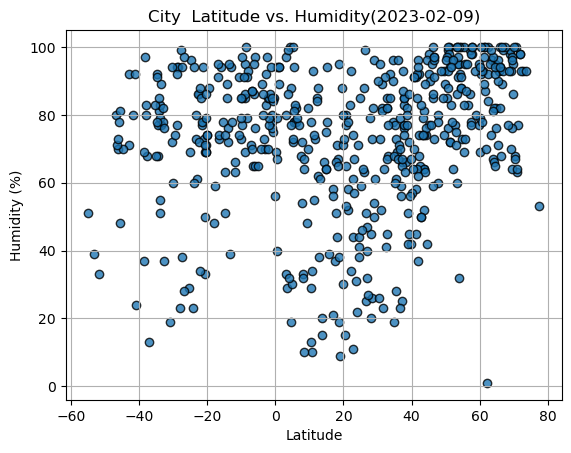

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title('City  Latitude vs. Humidity(2023-02-09)')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

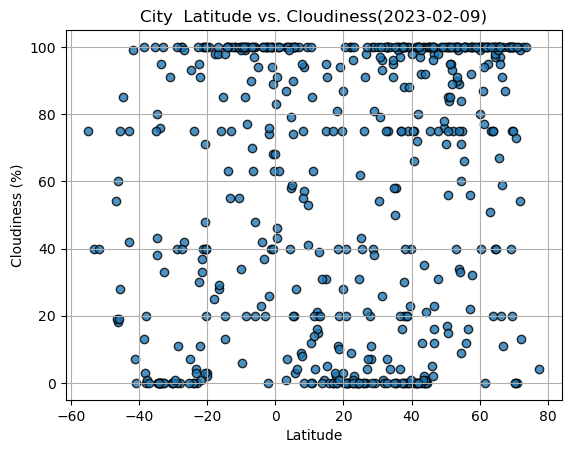

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title('City  Latitude vs. Cloudiness(2023-02-09)')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

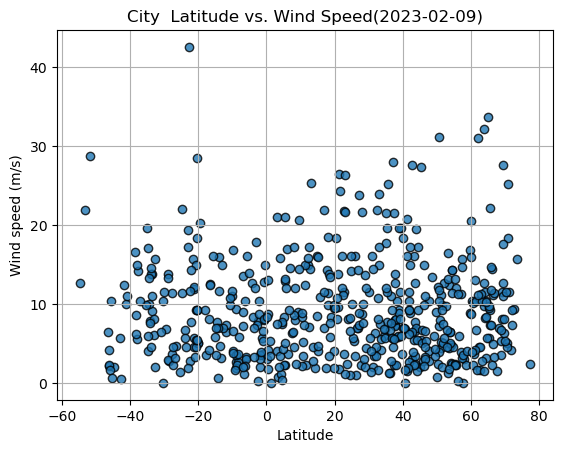

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title('City  Latitude vs. Wind Speed(2023-02-09)')
plt.ylabel("Wind speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regress_values = x_values * slope + intercept

# line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#print(f'The r-value is: {round(rvalue**2,2)}')

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alugan,12.2188,125.4808,78.51,85,21,14.92,PH,1676057436
1,goderich,43.7501,-81.7165,34.12,64,100,12.66,CA,1676057436
2,barrow,71.2906,-156.7887,-7.58,77,100,11.50,US,1676057437
3,zonguldak,41.2500,31.8333,28.99,91,100,1.52,TR,1676057438
4,businga,3.3333,20.8833,77.32,29,7,0.81,CD,1676057438


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,busselton,-33.6500,115.3333,57.06,77,0,9.13,AU,1676057439
6,mataura,-46.1927,168.8643,53.47,70,18,2.10,NZ,1676057439
7,mildura,-34.2000,142.1500,60.08,81,0,7.90,AU,1676057440
9,souillac,-20.5167,57.5167,80.98,69,40,9.22,MU,1676057441
10,rikitea,-23.1203,-134.9692,79.61,73,4,19.33,PF,1676057442


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7441201870532815


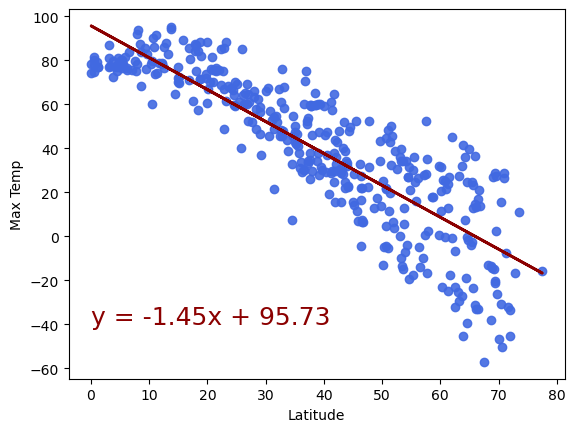

In [23]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f'The r-value is: {rvalue**2}')

plt.scatter(x_values,y_values,marker="o",color="royalblue", alpha =0.9, linewidths=1)
          
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(0,-40), fontsize=18, color='darkred')


plt.ylabel('Max Temp', fontsize=10, color='black')
plt.xlabel('Latitude', fontsize=10, color='black')


plt.show()

The r-value is: 0.199985102718923


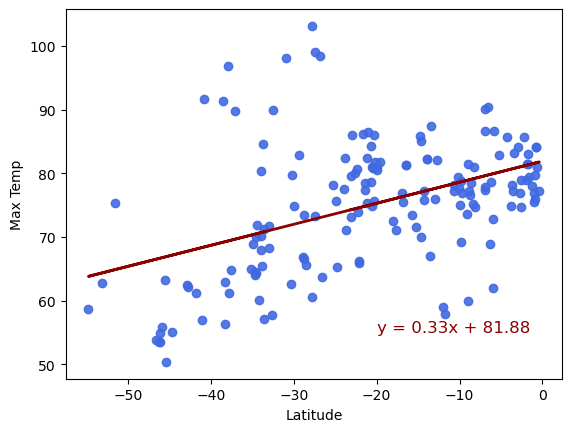

In [24]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f'The r-value is: {rvalue**2}')

plt.scatter(x_values,y_values,marker="o",color="royalblue", alpha =0.9, linewidths=1)
          
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(-20,55), fontsize=12, color='darkred')


plt.ylabel('Max Temp', fontsize=10, color='black')
plt.xlabel('Latitude', fontsize=10, color='black')


plt.show()

**Discussion about the linear relationship:** There is a positive correlation between maximum temperature and a latitude on the Southern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1793318528838519


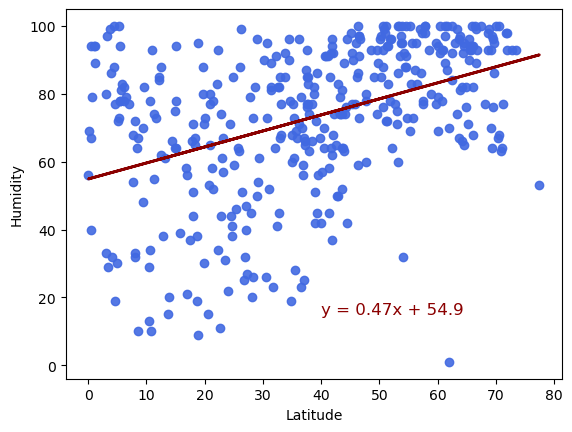

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f'The r-value is: {rvalue**2}')

plt.scatter(x_values,y_values,marker="o",color="royalblue", alpha =0.9, linewidths=1)
          
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(40,15), fontsize=12, color='darkred')


plt.ylabel('Humidity', fontsize=10, color='black')
plt.xlabel('Latitude', fontsize=10, color='black')


plt.show()

The r-value is: 0.08617210598099337


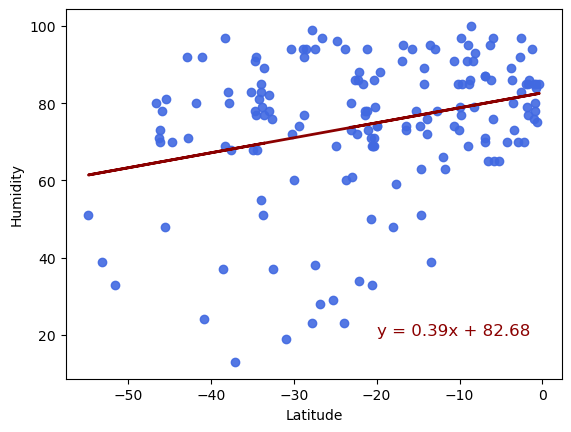

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f'The r-value is: {rvalue**2}')

plt.scatter(x_values,y_values,marker="o",color="royalblue", alpha =0.9, linewidths=1)
          
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(-20,20), fontsize=12, color='darkred')


plt.ylabel('Humidity', fontsize=10, color='black')
plt.xlabel('Latitude', fontsize=10, color='black')


plt.show()

**Discussion about the linear relationship:** There is almost no correlation between humidity level and city position moving north from equator.
There is a bit  positive correlation Humidity and a latitude on the Southern Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08301502743257473


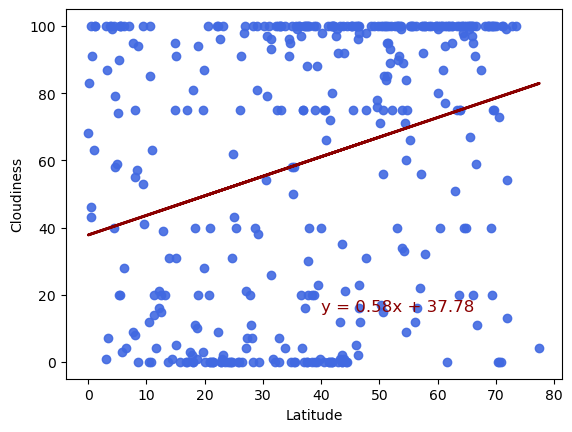

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f'The r-value is: {rvalue**2}')

plt.scatter(x_values,y_values,marker="o",color="royalblue", alpha =0.9, linewidths=1)
          
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(40,15), fontsize=12, color='darkred')


plt.ylabel('Cloudiness', fontsize=10, color='black')
plt.xlabel('Latitude', fontsize=10, color='black')


plt.show()

The r-value is: 0.15309549184723084


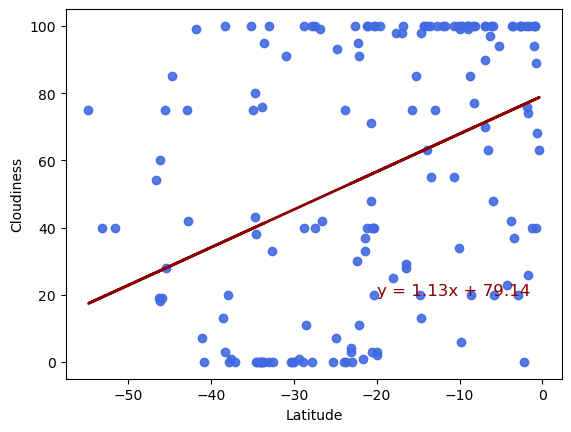

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f'The r-value is: {rvalue**2}')

plt.scatter(x_values,y_values,marker="o",color="royalblue", alpha =0.9, linewidths=1)
          
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(-20,20), fontsize=12, color='darkred')


plt.ylabel('Cloudiness', fontsize=10, color='black')
plt.xlabel('Latitude', fontsize=10, color='black')


plt.show()

**Discussion about the linear relationship:** There is no correlation Cloudiness and a latitude on the Southern Hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 1.8860457793092348e-06


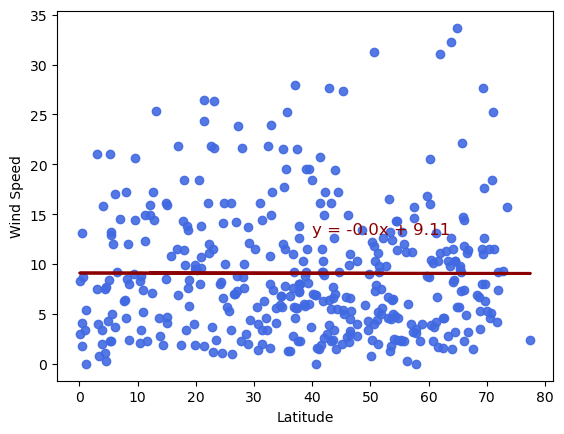

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f'The r-value is: {rvalue**2}')

plt.scatter(x_values,y_values,marker="o",color="royalblue", alpha =0.9, linewidths=1)
          
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(40,13), fontsize=12, color='darkred')


plt.ylabel('Wind Speed', fontsize=10, color='black')
plt.xlabel('Latitude', fontsize=10, color='black')


plt.show()

The r-value is: 0.021262348587570024


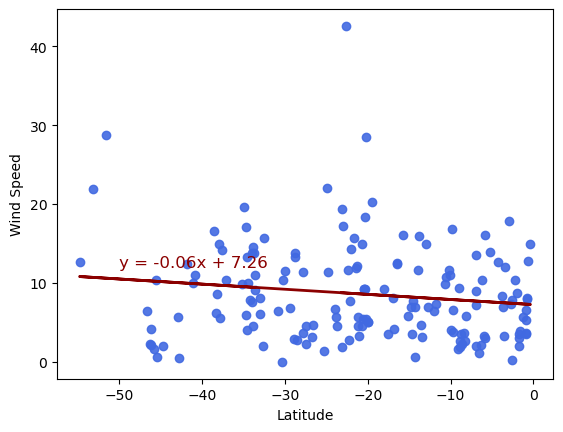

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f'The r-value is: {rvalue**2}')

plt.scatter(x_values,y_values,marker="o",color="royalblue", alpha =0.9, linewidths=1)
          
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(-50,12), fontsize=12, color='darkred')


plt.ylabel('Wind Speed', fontsize=10, color='black')
plt.xlabel('Latitude', fontsize=10, color='black')


plt.show()

**Discussion about the linear relationship:** There is no corroletion wind speed and Latitude neither Southern Hemisphere nor Northern Hemisphere.